**Vamos experimentar agora o algoritmo Decision Tree?**

In [42]:
!pip -q install yellowbrick


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.tree import DecisionTreeClassifier

In [44]:
with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\titanic.pkl', 'rb') as f:
    X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [45]:
print("Dimensões dos dados:")
print(f"X_treino: {X_treino.shape}")
print(f"X_teste: {X_teste.shape}")
print(f"y_treino: {y_treino.shape}")
print(f"y_teste: {y_teste.shape}")

Dimensões dos dados:
X_treino: (712, 22)
X_teste: (179, 22)
y_treino: (712,)
y_teste: (179,)


**Importando a biblioteca de ajuste de hiperparâmetros**

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Criando o modelo de árvore de decisão
# Você pode ajustar os hiperparâmetros conforme necessário
modelo = DecisionTreeClassifier(
    criterion='gini',  # Pode ser 'gini' ou 'entropy'
    max_depth=5,          # Profundidade máxima da árvore
    min_samples_split=10, # Número mínimo de amostras para dividir um nó
    min_samples_leaf=5,   # Número mínimo de amostras em uma folha
    random_state=42       # Para reprodutibilidade
)
modelo.fit(X_treino, y_treino)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [48]:
# modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
# modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [49]:
# Fazendo previsões
y_pred_treino = modelo.predict(X_treino)
y_pred_teste = modelo.predict(X_teste)



> **Será se o modelo acertou?**



In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Avaliando o modelo
print("\nAcurácia no conjunto de treino:", accuracy_score(y_treino, y_pred_treino))
print("Acurácia no conjunto de teste:", accuracy_score(y_teste, y_pred_teste))


Acurácia no conjunto de treino: 0.8595505617977528
Acurácia no conjunto de teste: 0.8212290502793296


In [51]:
# Matriz de confusão
print("\nMatriz de confusão (conjunto de teste):")
conf_matrix = confusion_matrix(y_teste, y_pred_teste)
print(conf_matrix)


Matriz de confusão (conjunto de teste):
[[91 14]
 [18 56]]


c:\Users\João\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8212290502793296

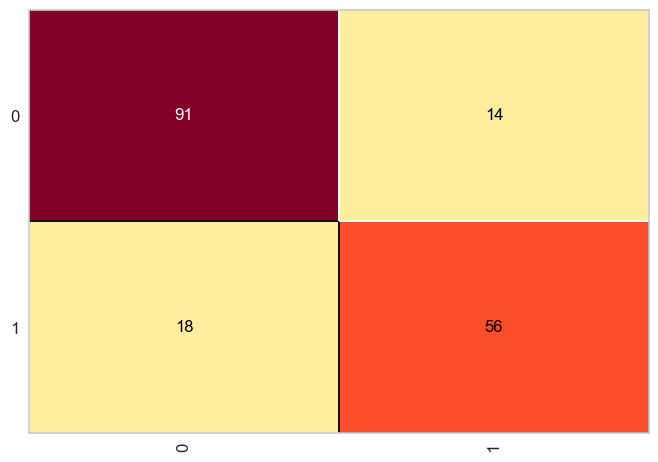

In [52]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

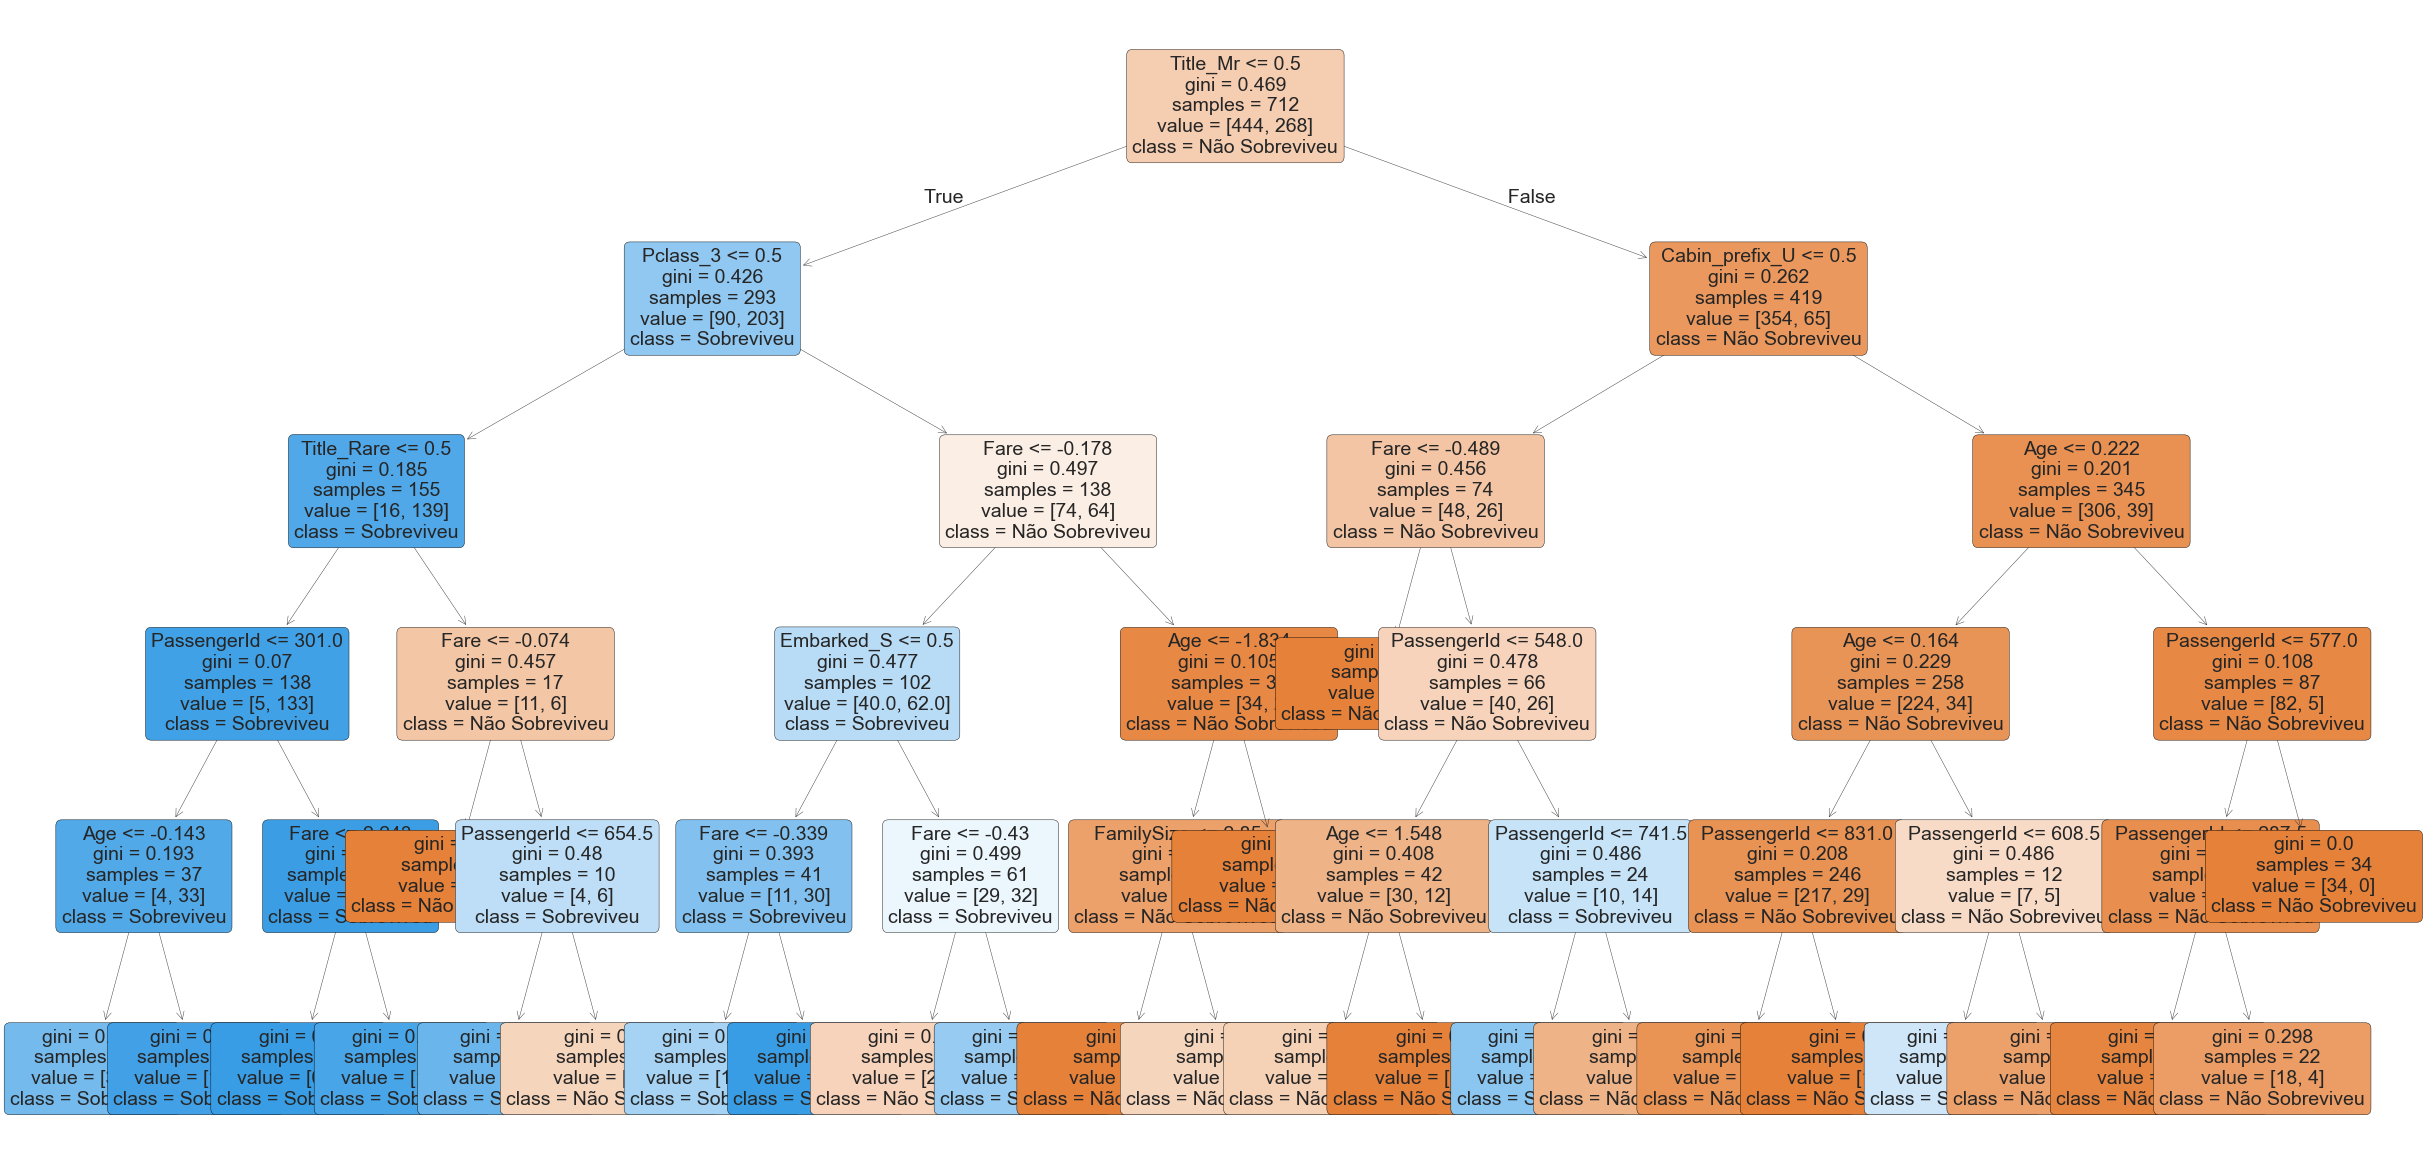

In [57]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

# Método 1: Visualização básica com matplotlib (mais legível)
plt.figure(figsize=(30, 15))  # Aumentei o tamanho da figura
tree.plot_tree(
    modelo, 
    feature_names=X_treino.columns,
    class_names=['Não Sobreviveu', 'Sobreviveu'],
    filled=True, 
    rounded=True,
    fontsize=14  # Aumentei o tamanho da fonte
)
plt.savefig(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\arvore_decisao_titanic.png', 
            dpi=300, 
            bbox_inches='tight',
            pad_inches=0.5)
plt.show()

In [ ]:
# Para uma visualização mais compacta (opcional)
from sklearn.tree import export_text
texto_arvore = export_text(modelo, feature_names=list(X_treino.columns))
print("\nRepresentação textual da árvore:")
print(texto_arvore)


In [ ]:
importancias = pd.Series(modelo.feature_importances_, index=X_treino.columns)
importancias = importancias.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importancias.plot(kind='bar')
plt.title('Importância das Características')
plt.tight_layout()
plt.savefig(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\importancia_caracteristicas.png')
plt.show()

# Salvando o modelo treinado
with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\modelo_arvore_titanic.pkl', 'wb') as f:
    pickle.dump(arvore, f)

print("\nModelo salvo com sucesso!")